# Projeto COVID-19

## Projeto proposto pela Digital Innovation One

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [5]:
url = 'https://raw.githubusercontent.com/neylsoncrepalde/projeto_eda_covid/master/covid_19_data.csv'

In [7]:
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [8]:
# Conferir os tipos de cada coluna
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Nomes de colunas não devem ter letras maiúsculas e nem caracteres especiais. Vamos implementar uma função para fazer a limpeza dos nomes dessas colunas

In [9]:
import re

def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [ ]:
# Corrigindo todas as colunas do df
df.columns = [corrige_colunas(col) for col in df.columns]
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


# Brasil

Vamos selecionar apenas os dados do Brasil para investigar

In [14]:
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [16]:
brazil = df.loc[
    (df.countryregion == 'Brazil') & 
    (df.confirmed > 0)
]

brazil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


# Casos Confirmados

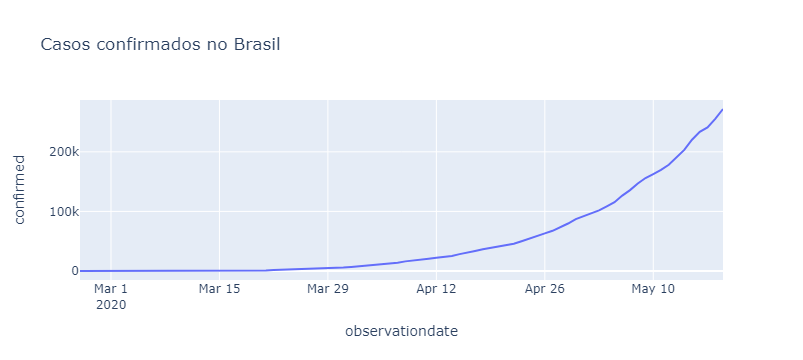

In [18]:
# Gráfico da evolução de casos confirmados

px.line(brazil, 'observationdate', 'confirmed', title='Casos confirmados no Brasil')

# Novos casos por dia

C:\Users\matte\AppData\Local\Temp\ipykernel_16052\2347821652.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



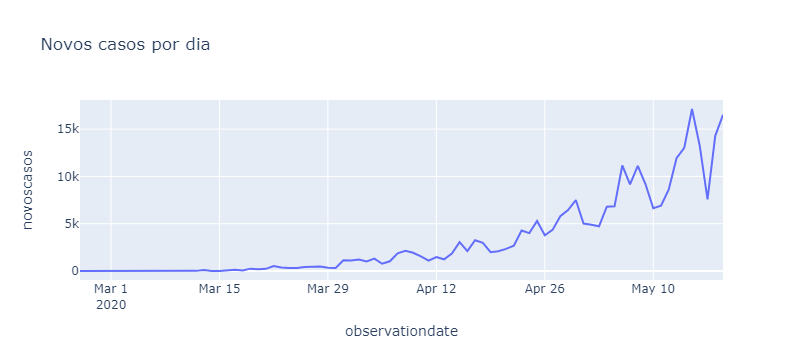

In [22]:
# Técnica de programação funcional

brazil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brazil['confirmed'].iloc[x] - brazil['confirmed'].iloc[x-1],
    np.arange(brazil.shape[0])
))

px.line(brazil, x='observationdate', y='novoscasos', title='Novos casos por dia')

# Mortes

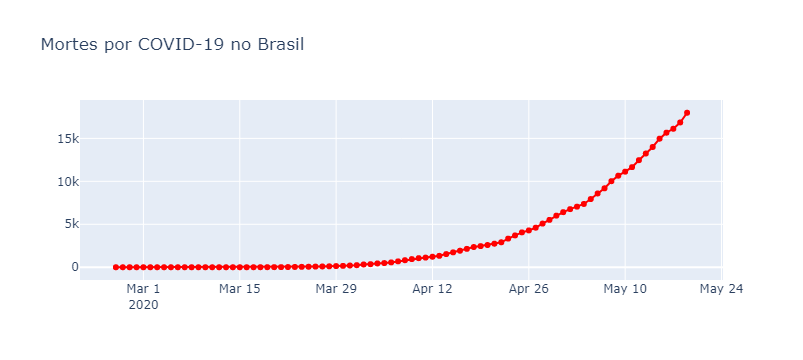

In [25]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brazil.observationdate, y=brazil.deaths, name='Mortes',
              mode='lines+markers', line={'color': 'red'})
)

# Layout
fig.update_layout(title='Mortes por COVID-19 no Brasil')
fig.show()

# Taxa de Crescimento

taxa_crescimento = (presente/passado)**(1/n) - 1

In [31]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    # Se data inicio for None, define como a primeira data disponível
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
        
    # Define os valores do presente e passado
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
    
    
    # Define os número de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Calcular a taxa
    taxa = (presente/passado)**(1/n) - 1
    
    return taxa*100

In [32]:
# Taxa de crescimento médio do COVID no Brasil em todo o período
taxa_crescimento(brazil, 'confirmed')

16.27183353112116

In [33]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.observationdate.max()
    n = (data_fim - data_inicio).days
    
    # Taxa calculada de um dia para outro
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1] / data[variable].iloc[x-1]),
        
        range(1, n+1)
    ))
    
    return np.array(taxas) * 100

In [34]:
tx_dia = taxa_crescimento_diaria(brazil, 'confirmed')
tx_dia

array([0.00000e+00, 0.00000e+00, 1.00000e+02, 1.00000e+02, 1.00000e+02,
       1.00000e+02, 3.00000e+02, 3.00000e+02, 1.20000e+03, 1.20000e+03,
       1.90000e+03, 2.40000e+03, 3.00000e+03, 3.70000e+03, 5.10000e+03,
       1.50000e+04, 1.50000e+04, 1.61000e+04, 1.99000e+04, 3.20000e+04,
       3.71000e+04, 6.20000e+04, 7.92000e+04, 1.02000e+05, 1.54500e+05,
       1.92300e+05, 2.24600e+05, 2.55300e+05, 2.98400e+05, 3.41600e+05,
       3.90300e+05, 4.25500e+05, 4.57800e+05, 5.71600e+05, 6.83500e+05,
       8.04300e+05, 9.05500e+05, 1.03590e+06, 1.11290e+06, 1.21600e+06,
       1.40330e+06, 1.61690e+06, 1.80910e+06, 1.96370e+06, 2.07260e+06,
       2.21910e+06, 2.34290e+06, 2.52610e+06, 2.83190e+06, 3.04240e+06,
       3.36810e+06, 3.66570e+06, 3.86530e+06, 4.07420e+06, 4.30780e+06,
       4.57560e+06, 5.00350e+06, 5.40420e+06, 5.93230e+06, 6.30990e+06,
       6.74450e+06, 7.32340e+06, 7.96840e+06, 8.71860e+06, 9.22010e+06,
       9.70990e+06, 1.01825e+07, 1.08619e+07, 1.15454e+07, 1.266

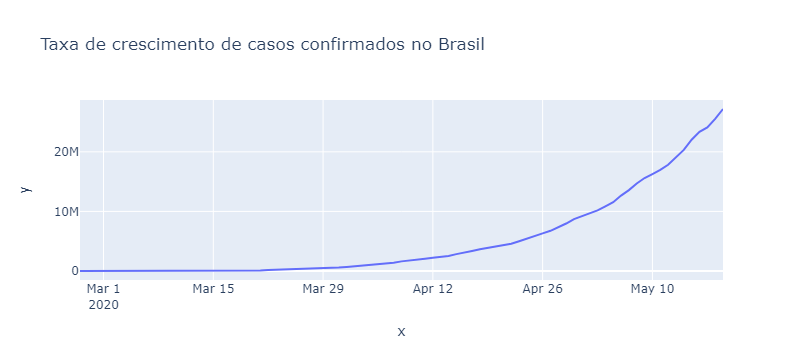

In [36]:
primeiro_dia = brazil.observationdate.loc[brazil.confirmed > 0].min()

px.line(x=pd.date_range(primeiro_dia, brazil.observationdate.max())[1:],
       y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil')

# Predições

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [38]:
confirmados = brazil.confirmed
confirmados.index = brazil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [39]:
res = seasonal_decompose(confirmados)

<function matplotlib.pyplot.show(close=None, block=None)>

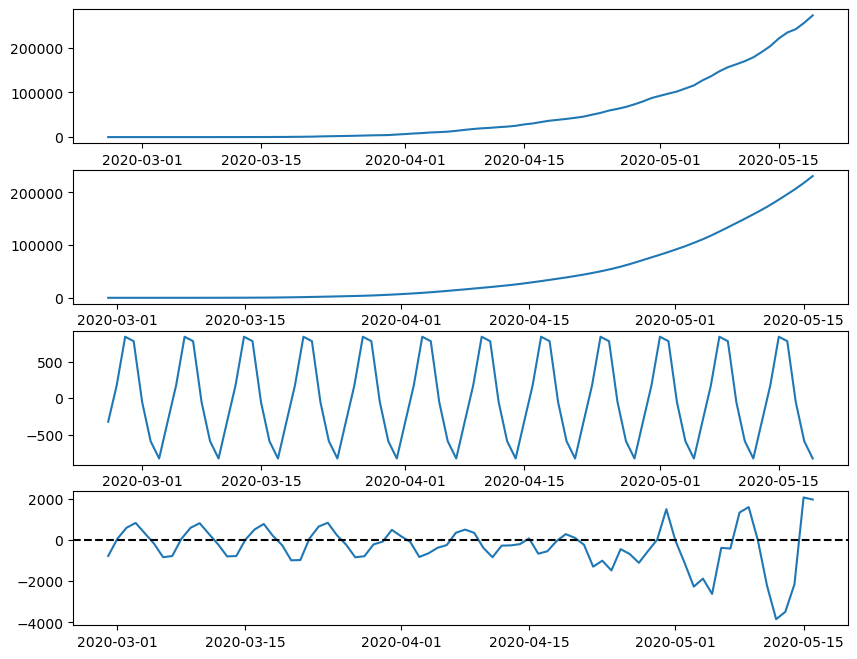

In [40]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show

# ARIMA

In [41]:
!pip install pmdarima

     -------------------------------------- 572.0/572.0 kB 8.9 MB/s eta 0:00:00


In [43]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)

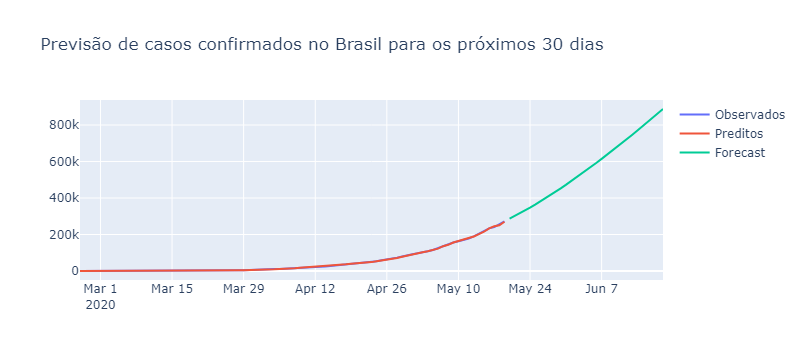

In [44]:
fig = go.Figure(go.Scatter (
    x=confirmados.index, y=confirmados, name='Observados'
))

fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
    
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()

# Modelo de crescimento

In [ ]:
!conda install -c conda-forge fbprophet -y

In [ ]:
from fbprophet import Prophet

In [ ]:
#Pre-processamentos
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

# Renomeando colunas
train.rename(columns={'observationdate':'ds', 'confirmed': 'y'}, inplace=True)
test.rename(columns={'observationdate':'ds', 'confirmed': 'y'}, inplace=True)

#Definir o modelo de crescimento
profeta = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25',
                                                    '2020-05-03', '2020-05-10'])

pop = 211463256
train['cap'] = pop

# Treinar o modelo
profesta.fit(train)

# Construir previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()